![](https://1.bp.blogspot.com/-EKYS2teelzM/WgB-t2lzzqI/AAAAAAAAAgY/iWsXcbqbHsMy9dkQQFzepN4Z2jQXEf-AQCLcBGAs/s1600/z.jpg)

In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Datasets'
data_name = 'AI Specialist Lesson 08.zip'
path = os.path.join(data_path, data_name)

os.mkdir('Lesson 08')
working_dir = os.path.join(os.getcwd(), 'Lesson 08')
os.chdir(working_dir)

In [4]:
with zipfile.ZipFile(path, 'r') as data_zipfile:
  data_zipfile.extractall(working_dir)

In [ ]:
# Step 1. Problem Understanding :
# Feature ? Target ? Classification or Regression
# Step 2.  Data Understanding :
# Missing Values ? Outlier(Noise) ? Inconsistent ? Imbalanced ? Skewness ?
# Step 3. Feature Understanding :
# EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis
# Step 4. Feature Engineering :
# Skewness/Inconsistent/Missing/Outlier Handling,
# Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding,
# Feature Scaling (Normalization & Standardization)
# Step 5. Dataset Partition :
# Imblanced Handling, Train Test Split
# Step 6. Data Modelling :
# Try many ML methods
# Step 7. Data Evaluation :
# Display Metrics for Classification (Accuracy, Precision, Recall),
# Display Metrics for Regression (R2Score, MSE, RMSE)
# Step 8. Hyper-parameter Tuning :
# Tuning parameters: Cross Validation (CV), GridSearchCV, Regularization (L1, L2 penalty)
# Step 9. Build the pipeline with the best Model with the best parameters
# Choose best hyper-parameters and build best models
# Step 10. Conclusion

# **1. Step 1: Problem Understanding**
* **Feature? Target? Classification or Regression**

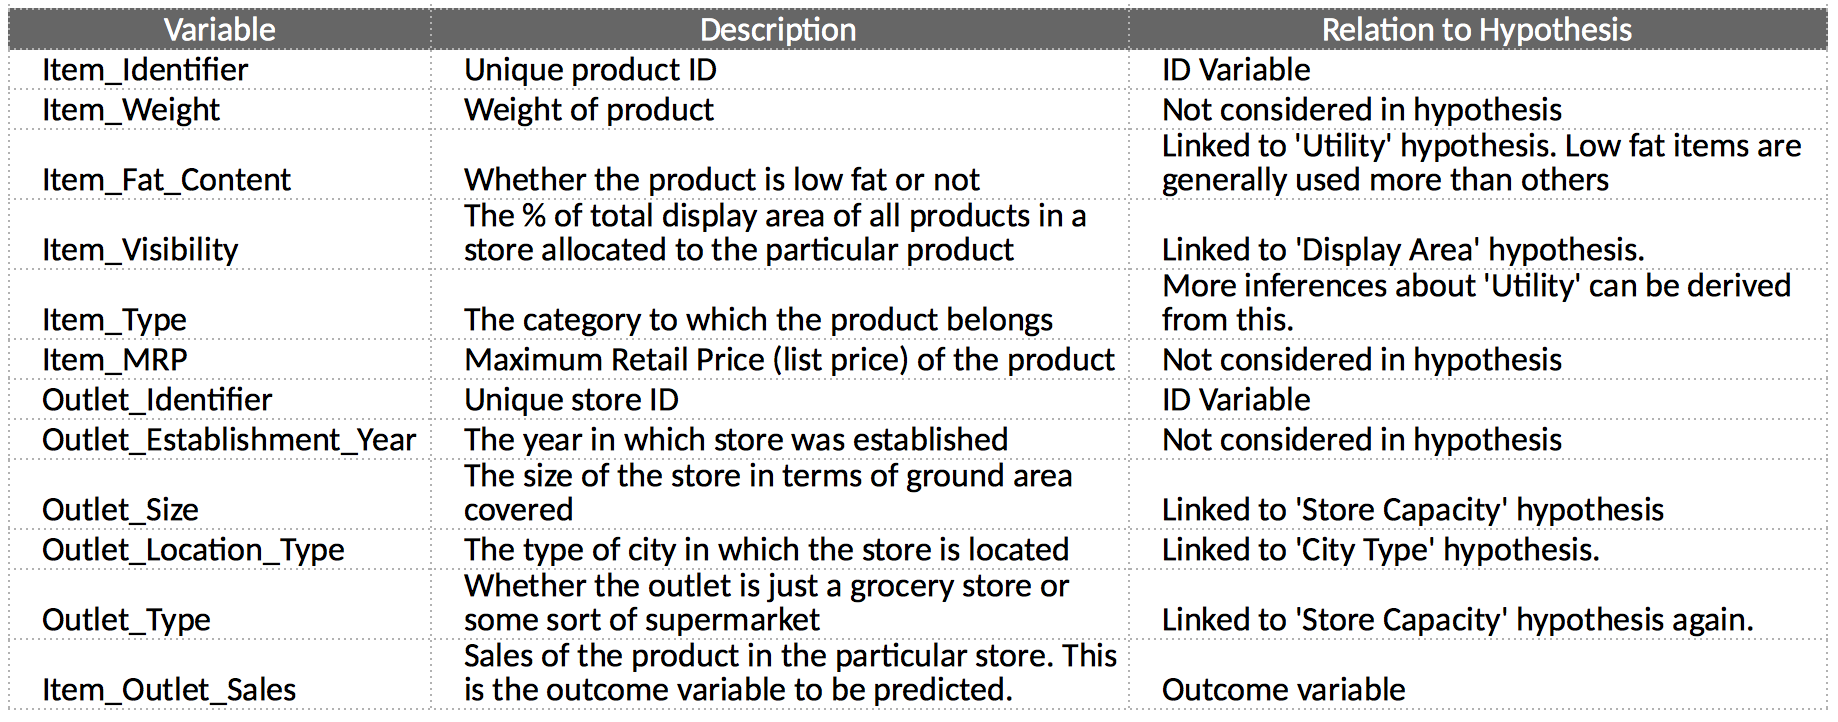

In [5]:
display(Image(filename='AI Specialist Lesson 08/BigMartSales Prediction/Description.png', width=750, height=500))

In [6]:
train = pd.read_csv('AI Specialist Lesson 08/BigMartSales Prediction/Train.csv')
test = pd.read_csv('AI Specialist Lesson 08/BigMartSales Prediction/Test.csv')

print(train.shape)
display(train.head())
print(test.shape)
display(test.head())

(8523, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(5681, 11)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


>**Conclusion:**
* Feature of Item: 'Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP',
* Feature of Outlet : 'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'
* Target : `Item_Outlet_Sales`
* Type of MLs Approach : `Regression`

# **2. Step 2: Data Understanding**
* **Missing Values? Outlier(Noise)? Inconsistent? Imbalanced? Skewness?**

>**Note:**
* Data of Test does not have target `Item_Outlet_Sales` ==> It should combine train and test into one to make the analysis and transformation
* After that, seperate back to train and test.
* Việc kết hợp train set và test set còn nhằm mục đích đề phòng trường hợp 2 tập này có data khác nhau (thí dụ train thu được trong 6 tháng đầu năm, test thu được trong 6 tháng cuối năm, nếu model chỉ học trên train set thì sẽ khó dự đoán đúng được ở test set), trộn 2 tập này để model có thể học được đặc trưng của data trong cả 2 tập.

In [8]:
print(train.shape)
print(test.shape)

train['Source']='train'
test['Source']='test'
test['Item_Outlet_Sales']=0.0

data=pd.concat([train, test],sort=False,ignore_index=True)
print(data.shape)

(8523, 12)
(5681, 11)
(14204, 13)


### **2.1 Missing Values?**

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,1308.865489
std,4.652502,0.051459,62.086938,8.371664,1699.791423
min,4.555000,0.000000,31.290000,1985.000000,0.000000
25%,8.710000,0.027036,94.012000,1987.000000,0.000000
50%,12.600000,0.054021,142.247000,1999.000000,559.272000
75%,16.750000,0.094037,185.855600,2004.000000,2163.184200
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [11]:
display(100*(data.isnull().sum()/data.shape[0]))
Percent = 100*(data['Item_Visibility']==0).sum()/data.shape[0]
print(f'Item_Visibility=0: {Percent}%')

Item_Identifier               0.000000
Item_Weight                  17.171219
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.273726
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
Source                        0.000000
dtype: float64

Item_Visibility=0: 6.188397634469164%


>**Conclusion:**
* Missing Value occur at features: Item_Weight(17.17%) and Outlet_Size(28.27%)
* Item_Visibility nhận giá trị bằng 0 là không đúng.
* Investigate some unreasonable value at feature : Item_Visibility with value 0 (6.18%)

### **2.2 Outlier(Noise)?**

In [12]:
data01 = data[data['Item_Visibility']>0]
Stats = data01.describe()
for col in Stats.columns:
  meanV, stdV = Stats.loc['mean', col], Stats.loc['std', col]
  minV, maxV = Stats.loc['min', col], Stats.loc['max', col]
  q1, q2, q3 = Stats.loc['25%', col], Stats.loc['50%', col], Stats.loc['75%', col]
  IQR = q3-q1

  ConfRange1 = [round(meanV-3*stdV, 2), round(meanV+3*stdV, 2)]
  ConfRange2 = [round(q1-1.5*IQR, 2), round(q3+1.5*IQR, 2)]
  print(f"{col} : \n\tMin is {minV} and Max is {maxV} \n\tConfident Range 1 is {ConfRange1} and Range 2 is {ConfRange2}")

Item_Weight : 
	Min is 4.555 and Max is 21.35 
	Confident Range 1 is [-1.15, 26.75] and Range 2 is [-3.35, 28.81]
Item_Visibility : 
	Min is 0.003574698 and Max is 0.328390948 
	Confident Range 1 is [-0.08, 0.22] and Range 2 is [-0.07, 0.2]
Item_MRP : 
	Min is 31.29 and Max is 266.8884 
	Confident Range 1 is [-44.93, 327.14] and Range 2 is [-43.43, 323.43]
Outlet_Establishment_Year : 
	Min is 1985.0 and Max is 2009.0 
	Confident Range 1 is [1972.7, 2022.96] and Range 2 is [1961.5, 2029.5]
Item_Outlet_Sales : 
	Min is 0.0 and Max is 13086.9648 
	Confident Range 1 is [-3785.48, 6400.42] and Range 2 is [-3245.77, 5409.62]


>**Conclusion:**
* Feature have outlier values : `Item_Visibility` vì có giá trị max vượt ra ngoài cả 2 ConfRange.

### **2.3 Inconsistent?**

In [13]:
CatFeatures = [col for col in data.columns if data[col].dtypes in ['object']]
NumFeatures = [col for col in data.columns if data[col].dtypes not in ['object']]
print(CatFeatures)
print(NumFeatures)

for col in CatFeatures:
  print(f'\n{col}: \n{data[col].value_counts()}')

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Source']
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']

Item_Identifier: 
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content: 
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Item_Type: 
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods           

>**Conclution:**
* Inconsistent: `Item_Fat_Content`
* `Low Fat` & `LF` & `low fat` là giống nhau
* `Regular` & `reg` là giống nhau.

### **2.4 Imbalanced?**

In [14]:
data.skew()

<ipython-input-14-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Item_Weight                  0.101309
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Establishment_Year   -0.396465
Item_Outlet_Sales            1.544684
dtype: float64

>**Conclusion:**
* There is no skewed feature because all their skewness are less than 4

# **3. Step 3. Feature Understanding**
* EDA with Visualization on Univariate, BiVariate and MultiVariate Analysis

In [15]:
print(len(CatFeatures))
cat = list(set(CatFeatures)-set(['Source']))
print(len(cat))

8
7


In [16]:
print(CatFeatures)
print(cat)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Source']
['Outlet_Location_Type', 'Item_Fat_Content', 'Outlet_Size', 'Item_Type', 'Outlet_Identifier', 'Item_Identifier', 'Outlet_Type']


### **3.1 Univariate Analysis**

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

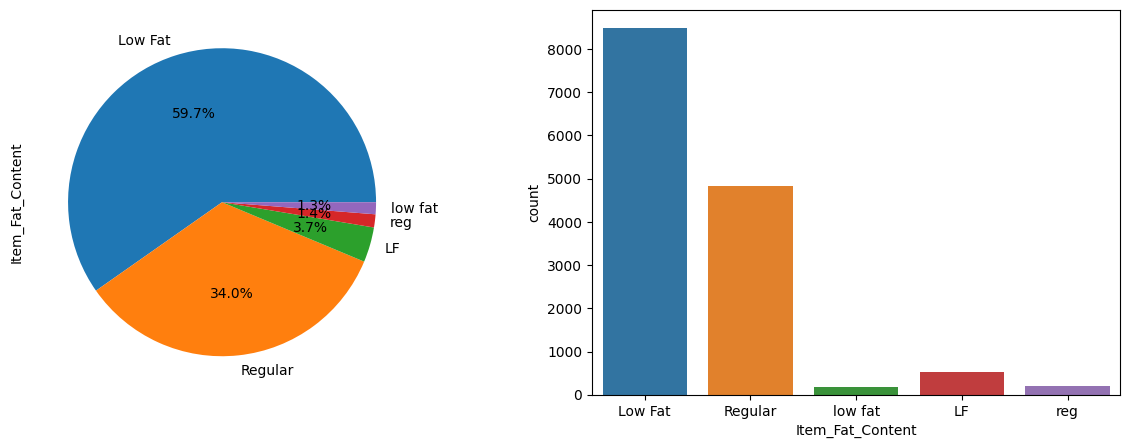

In [17]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data['Item_Fat_Content'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Item_Fat_Content', hue='Item_Fat_Content')
data['Item_Fat_Content'].value_counts()

>**Conclusion:**
* Different low fat categories need to be merged. Same must be done with regular categories.
* Low Fat products are much more than Regular products.

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

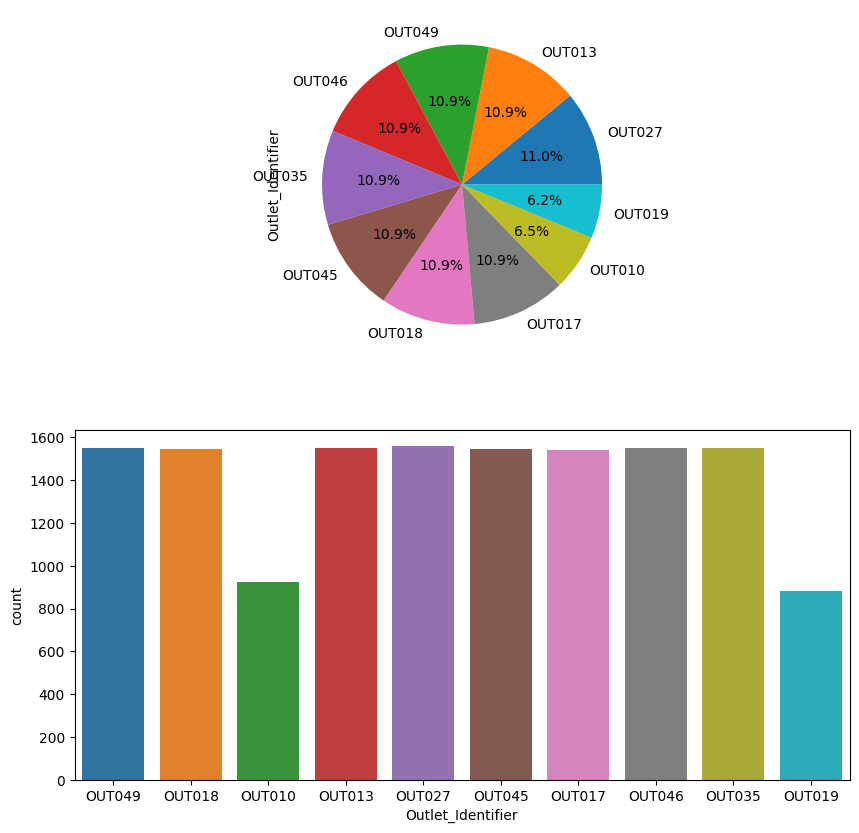

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
data['Outlet_Identifier'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2, 1, 2)
sns.countplot(data=data, x='Outlet_Identifier', hue='Outlet_Identifier')
data['Outlet_Identifier'].value_counts()

>**Conclusion:**
* There are 10 outlets which are almost balanced except for two outlets

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

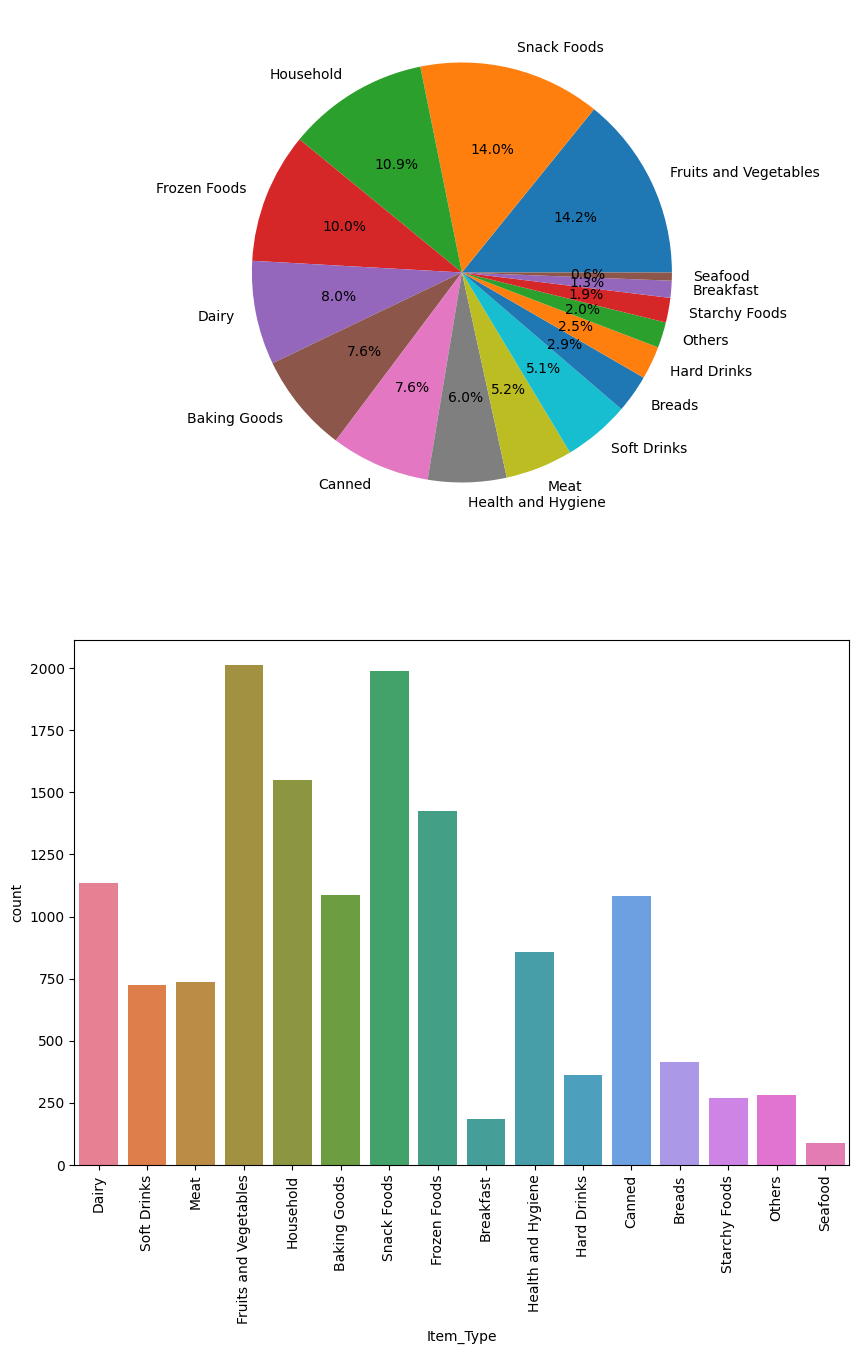

In [19]:
plt.figure(figsize=(10, 15))
plt.subplot(2, 1, 1)
data['Item_Type'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize':10})
plt.ylabel('')
plt.subplot(2, 1, 2)
sns.countplot(data=data, x='Item_Type', hue='Item_Type')
plt.xticks(rotation=90)
data['Item_Type'].value_counts()

>**Conclusion:**
* `Fruits and Vegetables` and `Snack Foods` are the two categories in which most of the items fall whereas `Seafood` is the least

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

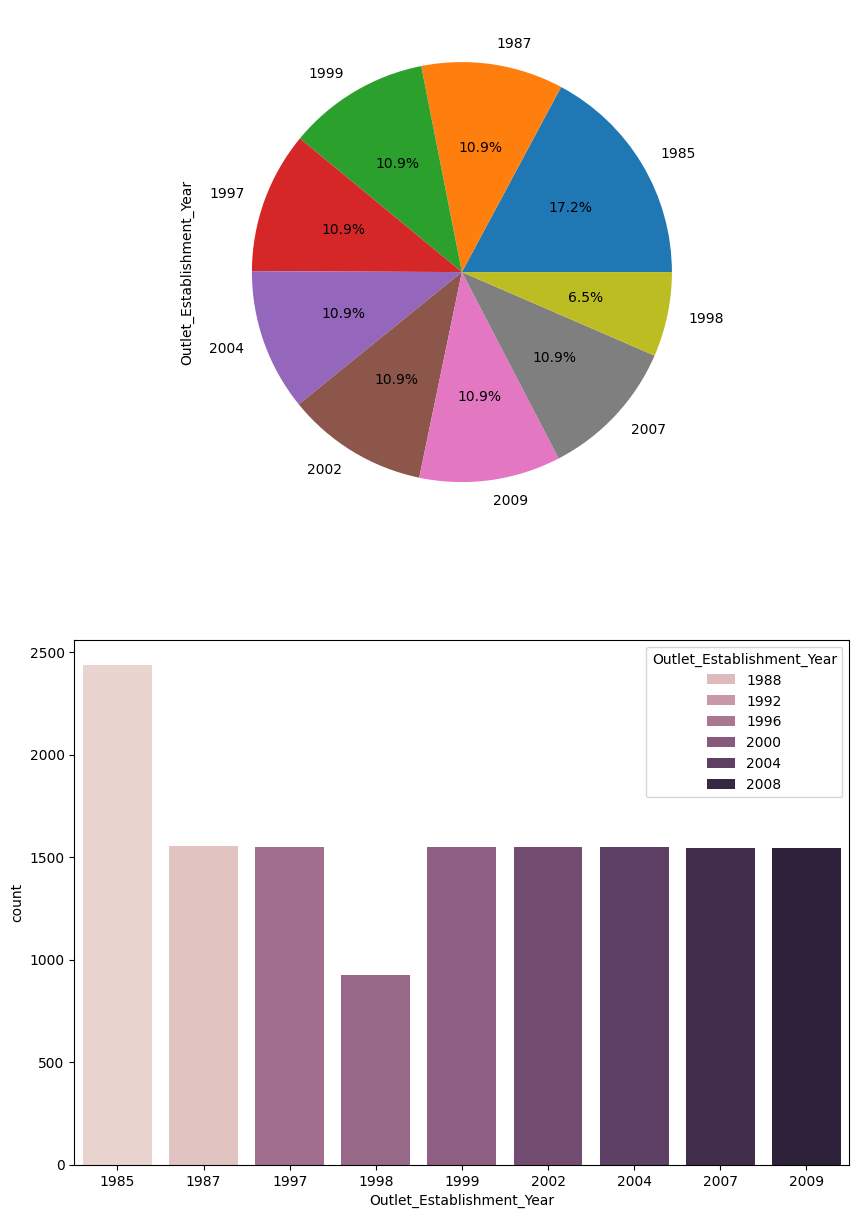

In [20]:
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
data['Outlet_Establishment_Year'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(2,1,2)
sns.countplot(data=data,x='Outlet_Establishment_Year', hue='Outlet_Establishment_Year')
data['Outlet_Establishment_Year'].value_counts()

>**Conclusion:**
* Most outlets were opened in 1985 and least in 1998

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

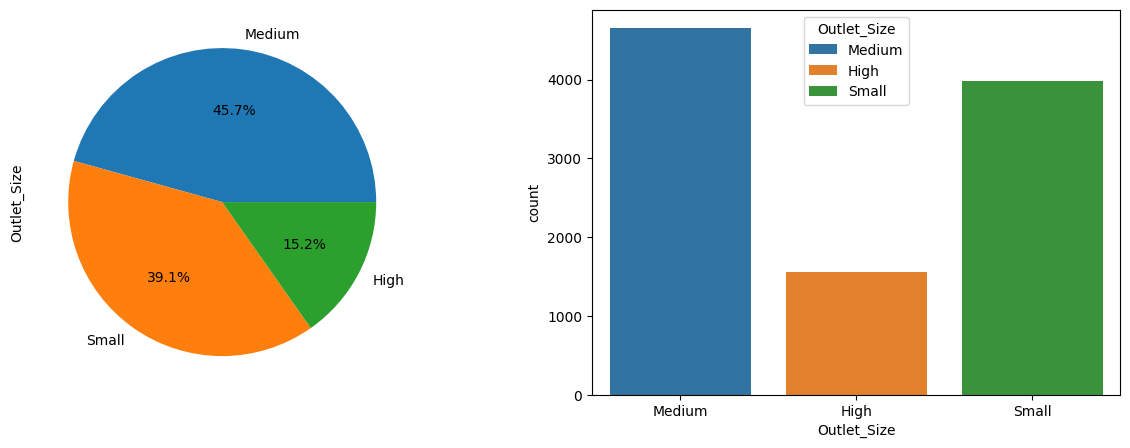

In [21]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['Outlet_Size'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=data, x='Outlet_Size', hue='Outlet_Size')
data['Outlet_Size'].value_counts()

>**Conclusion:**
* There are few outlets with high size. most of the outlets are of medium size.

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

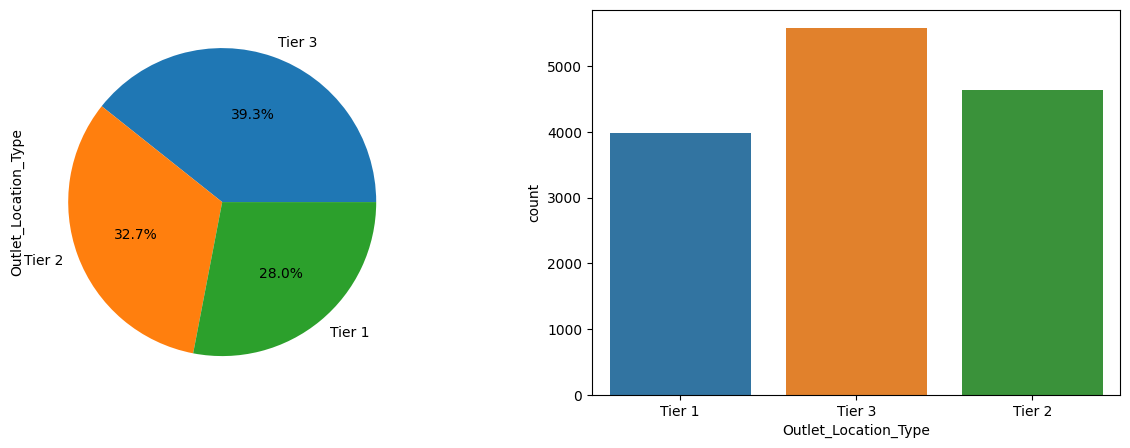

In [22]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
data['Outlet_Location_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='Outlet_Location_Type', hue='Outlet_Location_Type')
data['Outlet_Location_Type'].value_counts()

>**Conclusion:**
* Most of the stores are located in tier 2 cities.

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

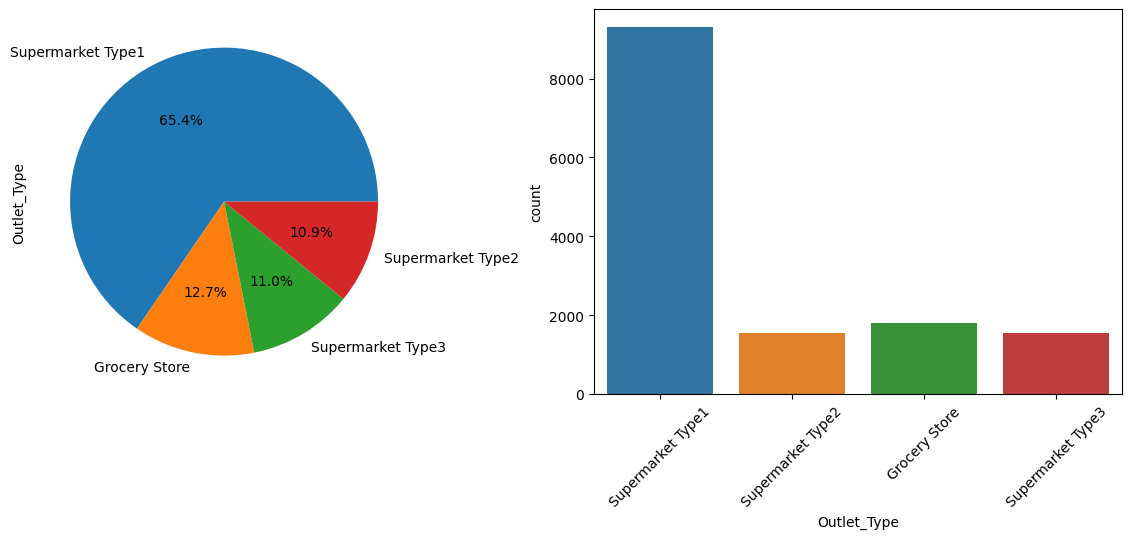

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
data['Outlet_Type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data=data, x='Outlet_Type', hue='Outlet_Type')
plt.xticks(rotation=45)
data['Outlet_Type'].value_counts()

>**Conclusion:**
* 65% of the outlets are of supermarket type 1.

In [24]:
print(NumFeatures)
cont = list(set(NumFeatures) - set(['Outlet_Establishment_Year' ,'Item_Outlet_Sales']))
print(cont)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']
['Item_MRP', 'Item_Visibility', 'Item_Weight']


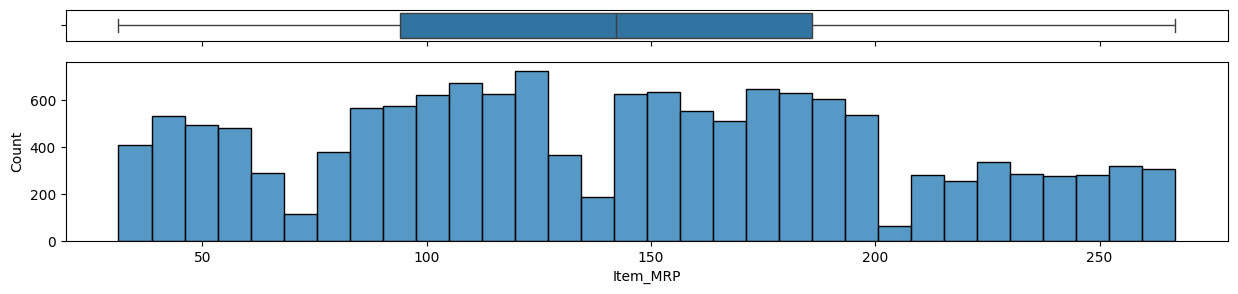

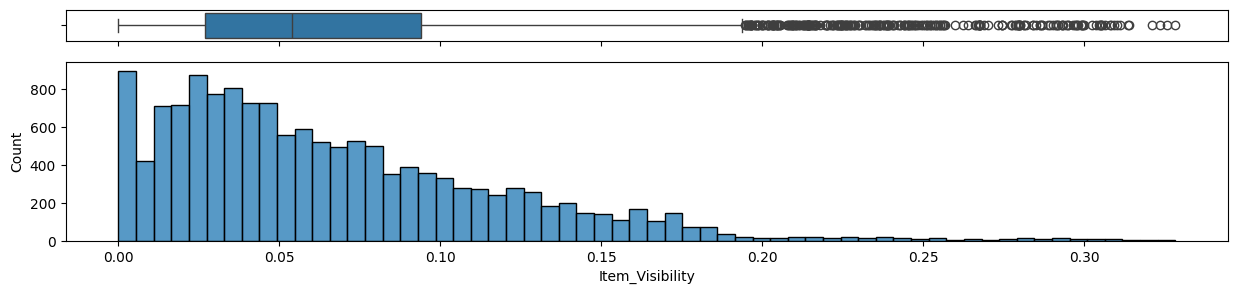

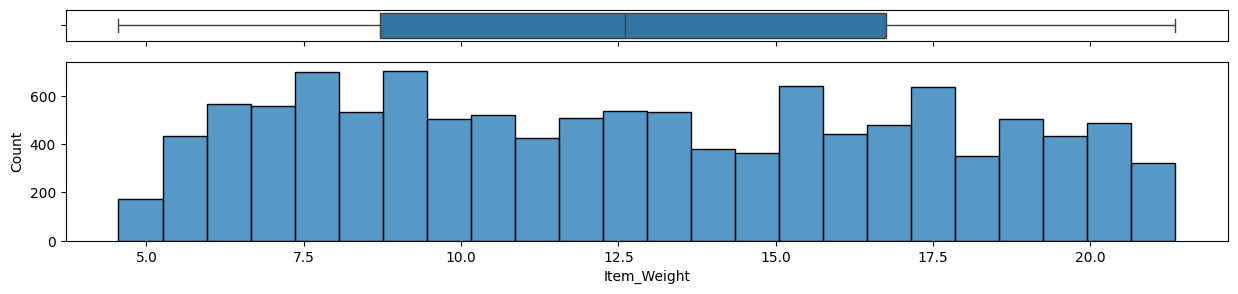

In [25]:
for feature in cont:
  f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
  f.set_figheight(3)
  f.set_figwidth(15)
  sns.boxplot(data=data, x=feature, ax=ax_box)
  sns.histplot(data=data, x=feature, ax=ax_hist)
  plt.show()

>**Conclusion:**
* Only `Item_Visibility` has large no. of outliers
* Only `Item_visibility` is skewed to the right while others almost follow the gaussian distribution.

### **3.2 Bivariate Analysis**
* Bivariate  Analysis
* Categorical vs Categorical : stripplot
* Categorical vs Numeric : stripplot
* Numeric vs Numeric : Scatter

<Axes: xlabel='Outlet_Location_Type', ylabel='Outlet_Type'>

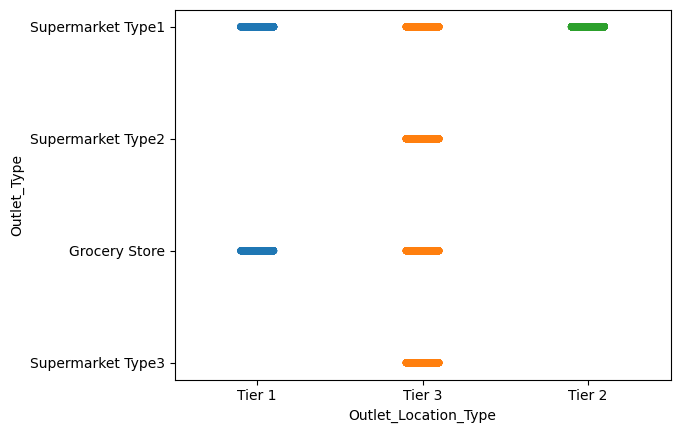

In [26]:
# Question:What is the distribution between Outlet_Location_Type & Outlet_Type
sns.stripplot(data=data, x='Outlet_Location_Type', y='Outlet_Type', hue='Outlet_Location_Type')

>**Conclusion:**
* `Tier 2` cities have only `Superkarket type 1`
* `Tier 1` cities have only supermarket 1 and grocery strores
* `Tier 3` có đủ các loại outlet, khớp với kết quả `Tier 3` city là nới có số lượng outlet lớn nhất từ phân tích `Outlet_Location_Type` bên trên.

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Type'>

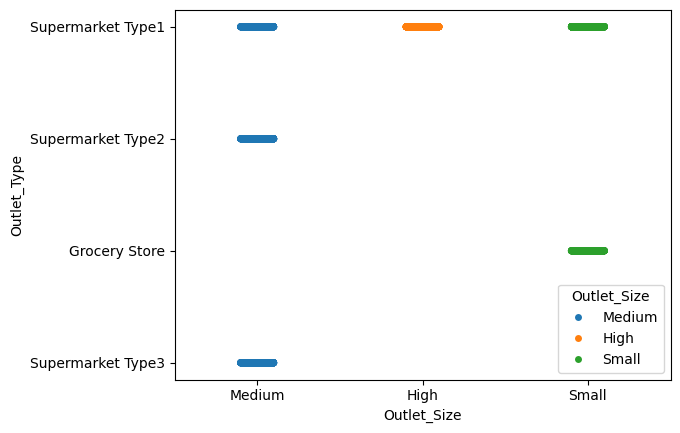

In [27]:
sns.stripplot(data=data, x='Outlet_Size', y='Outlet_Type', hue='Outlet_Size')

>**Conclusion:**
* `Supermarket Type1` are of all sizes
* `Grocery Store` are only small
* `Supermarket Type2`, `Supermarket Type3` are of medium size only.

<Axes: xlabel='Outlet_Size', ylabel='Outlet_Location_Type'>

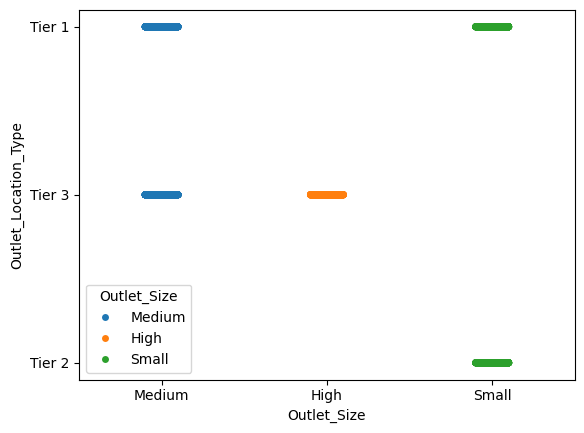

In [28]:
sns.stripplot(data=data, x='Outlet_Size', y='Outlet_Location_Type', hue='Outlet_Size')

>**Conclusion:**
* Tier 2 citis have only small outlet size
* high outlet size is only found in tier 3 cities

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

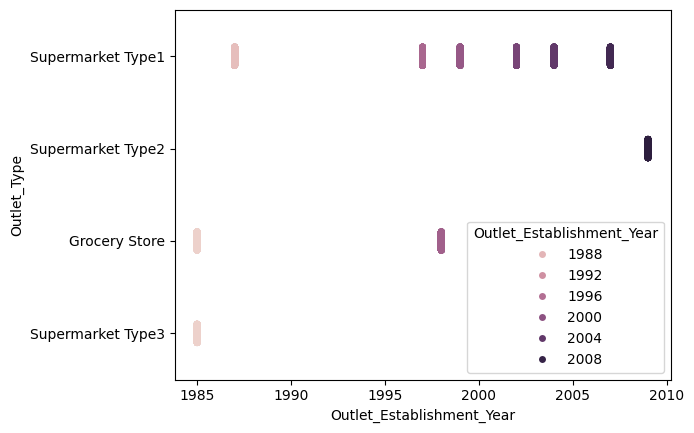

In [29]:
sns.stripplot(data=data, x='Outlet_Establishment_Year', y='Outlet_Type', hue='Outlet_Establishment_Year')

>**Conclusion:**
* `Supermarket Type2` was build much later while grocery stores and `Supermarket Type3` are the oldest outlet type.

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Location_Type'>

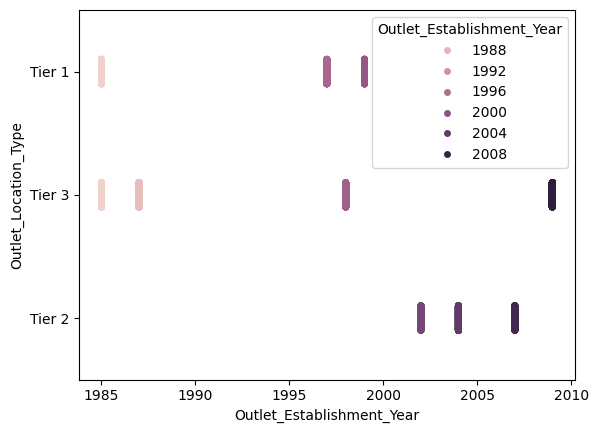

In [30]:
sns.stripplot(data=data, x='Outlet_Establishment_Year', y='Outlet_Location_Type', hue='Outlet_Establishment_Year')

>**Conclusion:**
* In Tier1 and tier3 cities outlets were established in 1985 whereas tier2 got outlets after 2000

# **4. Step 4. Feature Engineering**
* Skewness/Inconsistent/Missing/Outlier Handling,
* Feature Enrichment, Feature Transformation, Feature Selection, Feature Encoding,
* Feature Scaling (Normalization & Standardization)

### **4.1 Missing Value/ Nan Value Imputation**

##### **4.1.1 Feature : Item_Visibility**
* 0 --> NaN --> Imputate with a value (Choose Grouping by other features and calculate mean on each group : better than whole mean/median, lower than MLs approaches)**

In [31]:
!pip install association_metrics

  Preparing metadata (setup.py) ... done
  Created wheel for association_metrics: filename=association_metrics-0.0.1-py3-none-any.whl size=3929 sha256=6afd1c17c2c4015e31115a899613d70b830b27b9d45e215cfeee0d8a38f10f63
  Stored in directory: /root/.cache/pip/wheels/01/47/5f/4360ef6988df6f1b0c1857cab43334269110160bd97b716936
Successfully built association_metrics


In [32]:
import association_metrics as am
feature = 'Item_Visibility'
data[feature].replace(0, np.NaN, inplace=True)
data[feature].value_counts()

0.077169    3
0.076841    3
0.076483    3
0.077290    3
0.076856    3
           ..
0.162572    1
0.014826    1
0.058034    1
0.043786    1
0.104720    1
Name: Item_Visibility, Length: 13005, dtype: int64

In [33]:
# Correlation Between Numeric with Numeric
data.corr(numeric_only=True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018540,0.036236,0.000645,0.019447
Item_Visibility,-0.018540,1.000000,-0.009230,-0.091455,-0.080968
Item_MRP,0.036236,-0.009230,1.000000,0.000141,0.342781
Outlet_Establishment_Year,0.000645,-0.091455,0.000141,1.000000,-0.029489
Item_Outlet_Sales,0.019447,-0.080968,0.342781,-0.029489,1.000000


In [34]:
# Correlation Between Categorical with Categorical
corrdf = data[CatFeatures].copy()
corrdf = corrdf.apply(lambda x:x.astype('category') if x.dtype=='O' else x)
cramersV = am.CramersV(corrdf)
category_corr_matrix = cramersV.fit()
display(category_corr_matrix)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Source
Item_Identifier,1.000000,0.574985,1.000000,0.102063,0.073799,0.082409,0.120311,0.328087
Item_Fat_Content,0.574985,1.000000,0.215021,0.024022,0.015573,0.008796,0.015832,0.007133
Item_Type,1.000000,0.215021,1.000000,0.008476,0.007095,0.006881,0.011276,0.029976
Outlet_Identifier,0.102063,0.024022,0.008476,1.000000,1.000000,1.000000,1.000000,0.000275
Outlet_Size,0.073799,0.015573,0.007095,1.000000,1.000000,0.578765,0.552700,0.000094
Outlet_Location_Type,0.082409,0.008796,0.006881,1.000000,0.578765,1.000000,0.526540,0.000069
Outlet_Type,0.120311,0.015832,0.011276,1.000000,0.552700,0.526540,1.000000,0.000254
Source,0.328087,0.007133,0.029976,0.000275,0.000094,0.000069,0.000254,1.000000


In [44]:
# Correlation Between Numeric with Categorical
# Encoding Categorical to Numeric OrderEncoding ?
# Then uding df.corr()

from sklearn.preprocessing import OrdinalEncoder
def Encode_CatCols(data, Categorical_cols):
  enc_dict = {}
  data_encode = data.copy()
  for col in Categorical_cols:
    enc = OrdinalEncoder()
    data_encode[col] = enc.fit_transform(data_encode[[col]])
    enc_dict[col] = enc
  return data_encode, enc_dict

In [47]:
data_encoded, enc_dict = Encode_CatCols(data, CatFeatures)
data_encoded.corr()[feature].sort_values(ascending=False)

Item_Visibility              1.000000
Outlet_Size                  0.098833
Item_Fat_Content             0.035792
Source                       0.004357
Item_MRP                    -0.009230
Item_Weight                 -0.018540
Outlet_Location_Type        -0.020197
Item_Type                   -0.039057
Item_Identifier             -0.042184
Item_Outlet_Sales           -0.080968
Outlet_Establishment_Year   -0.091455
Outlet_Identifier           -0.112515
Outlet_Type                 -0.179116
Name: Item_Visibility, dtype: float64

In [50]:
# Về cơ bản, pivot-table là 1 kiểu group by, các giá trị tại được sắp xếp lại thành bảng 1 cách rõ ràng trực quan
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot_table.html
feature = 'Item_Visibility'
table = pd.pivot_table(data, values=feature, index='Item_Type',
                       columns='Outlet_Type', aggfunc='mean')

table

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [57]:
data01 = data.copy()

In [58]:
Replacement_IndexSeries = data01[data01[feature].isnull()].apply(lambda rows: table.loc[rows["Item_Type"], rows["Outlet_Type"]], axis=1)
Replacement_IndexSeries

3        0.114820
4        0.057774
5        0.068206
10       0.067123
32       0.065584
           ...   
14166    0.114820
14171    0.067549
14177    0.065578
14184    0.065485
14202    0.066167
Length: 879, dtype: float64

>**Conclusion:**
* `rows` chính là phần cần apply phần này nằm phía trước hàm `apply()`.
* ==> `rows` <==> `data01[data01[feature].isnull()]`: là DataFrame của `feature` tại giá trị NaN.
* `rows['Item_Type'] và rows['Outlet_Type'] là các giá trị ở `Item_Type` và `Outlet_Type` tương ứng với `feature` là NaN.

In [61]:
data01[feature].fillna(Replacement_IndexSeries, inplace=True)
data01[feature].isnull().sum()

0

##### **4.1.2 Feature: Item_Weight**

In [63]:
data01.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

In [65]:
feature = 'Item_Weight'
weight_table = pd.pivot_table(data01, values=feature, index='Item_Identifier', aggfunc='mean')
weight_table

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [67]:
Replacement_IndexSeries = data01[data01[feature].isnull()].apply(lambda rows:weight_table.loc[rows['Item_Identifier'], feature], axis=1)
Replacement_IndexSeries

7        19.000
18        8.260
21        8.315
23       15.500
29       14.500
          ...  
14178    15.100
14179     7.405
14184    16.200
14188    19.600
14192    11.500
Length: 2439, dtype: float64

In [68]:
data01[feature].fillna(Replacement_IndexSeries, inplace=True)
data01.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Source                          0
dtype: int64

##### **4.1.3 Feature: Outlet_Size**
* Approach 1: Replace NaN by Unknown Category
* Approach 2: Based On Outlet_ID to find out the missing value (Next Class : Choose this way)
* Approach 3: Group by  Outlet_Location_Type	Outlet_Type and find mode on Outlet_Size. Replace mode into missing value